In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import numpy as np
%matplotlib inline

In [140]:
cardio_data = pd.read_csv("/home/tsaralex/Downloads/cardio_train.csv",sep=";")
cardio_data = pd.DataFrame(cardio_data)

In [141]:
#посмотрим распределение веса и роста. обычно мужчины выше и тяжелее. из этого распределения можно 
#предположить, что 2 - male, 1- female

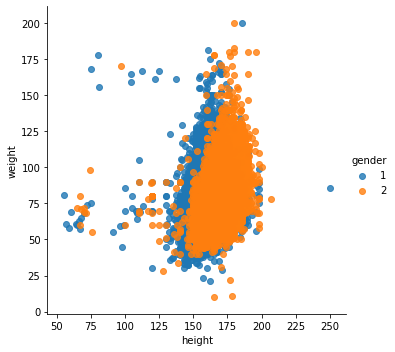

In [142]:
sns.lmplot(x='height',y='weight',data=cardio_data,hue='gender',scatter_kws={'alpha':0.8},fit_reg=False)

In [143]:
cardio_data['gender'] = cardio_data['gender'].map({1:'female',2:'male'})

In [144]:
# создаем индекс массы тела (в метрах - делим на 100)
cardio_data['BMI'] = cardio_data['weight']/(cardio_data['height']/100)**2
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,23.011177


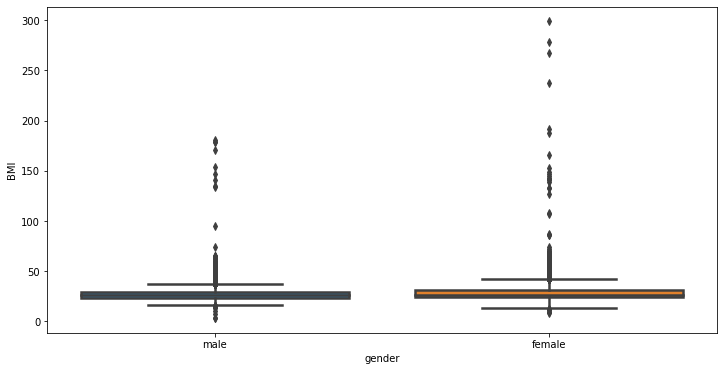

In [145]:
# визуализируем индекс массы тела
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='gender',y='BMI',data=cardio_data,linewidth=2.5)
# был вопрос, есть ли выбросы? ответ: есть

In [146]:
# удаляем из датасета людей с более высоким Диастолическим давлением относительно систолического
# считаем сколько таких людей было в процентах
cardio_data_filtered = cardio_data.query('ap_lo <= ap_hi')
print(np.around(100 - cardio_data_filtered.shape[0]/cardio_data.shape[0]*100,decimals=2),"%",sep=" ")

1.76 %


In [147]:
cardio_data_filtered.insert(2, "age_years", (cardio_data_filtered['age']/365).astype('int')) 

In [148]:
# из описание датасета находим расшифровку cholesterol колонки
cardio_data_filtered.insert(9, "cholesterol_level", cardio_data['cholesterol'].\
                            map({1: "normal", 2: "above_normal", 3: "well_above_normal"}))
cardio_data_filtered.head()

,id,age,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,cholesterol_level,gluc,smoke,alco,active,cardio,BMI
0,0,18393,50,male,168,62.0,110,80,1,normal,1,0,0,1,0,21.967120
1,1,20228,55,female,156,85.0,140,90,3,well_above_normal,1,0,0,1,1,34.927679
2,2,18857,51,female,165,64.0,130,70,3,well_above_normal,1,0,0,0,1,23.507805
3,3,17623,48,male,169,82.0,150,100,1,normal,1,0,0,1,1,28.710479
4,4,17474,47,female,156,56.0,100,60,1,normal,1,0,0,0,0,23.011177


Text(0, 0.5, 'Number of people')

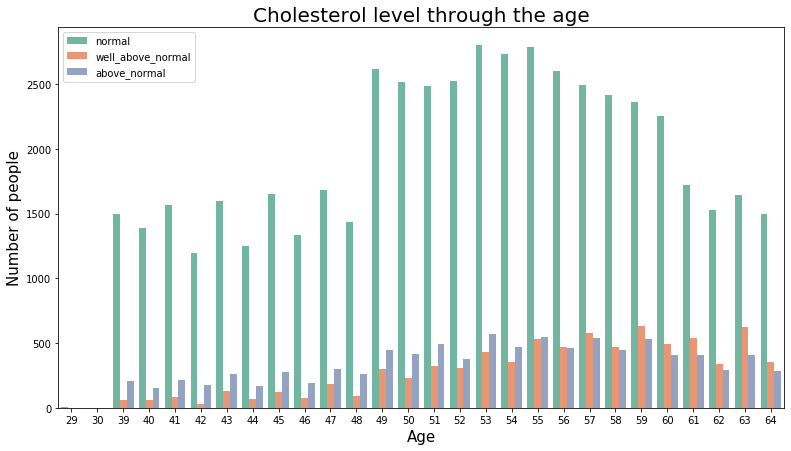

In [156]:
# визуализируем уровень холестерола по годам
plt.figure(figsize=(13,7))
cholesterol_plot = \
sns.countplot(x='age_years', hue='cholesterol_level', data = cardio_data_filtered, palette="Set2");
cholesterol_plot.legend(loc='upper left',)
cholesterol_plot.axes.set_title("Cholesterol level through the age",fontsize=20)
cholesterol_plot.set_xlabel("Age",fontsize=15)
cholesterol_plot.set_ylabel("Number of people",fontsize=15)

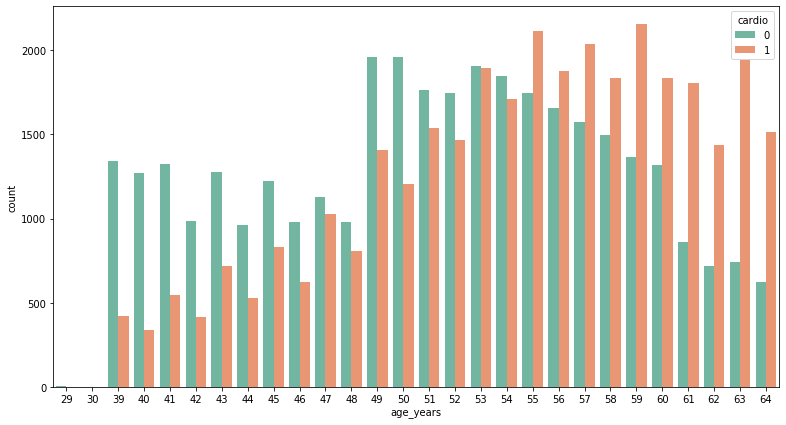

In [150]:
# посмотрим что такое 0 и 1 в cardio колонке
# видим что "1" возрастает с возрастом, что логично, так как такие заболевания появляются у пожилых
plt.figure(figsize=(13,7))
sns.countplot(x='age_years', hue='cardio', data = cardio_data_filtered, palette="Set2")

In [151]:
# переименовываем значения cardio в более понятные 
cardio_data_filtered['cardio'] = cardio_data_filtered['cardio'].map({0 : "normal", 1 :"cardiovascular disease"})

/home/tsaralex/Documents/Programms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


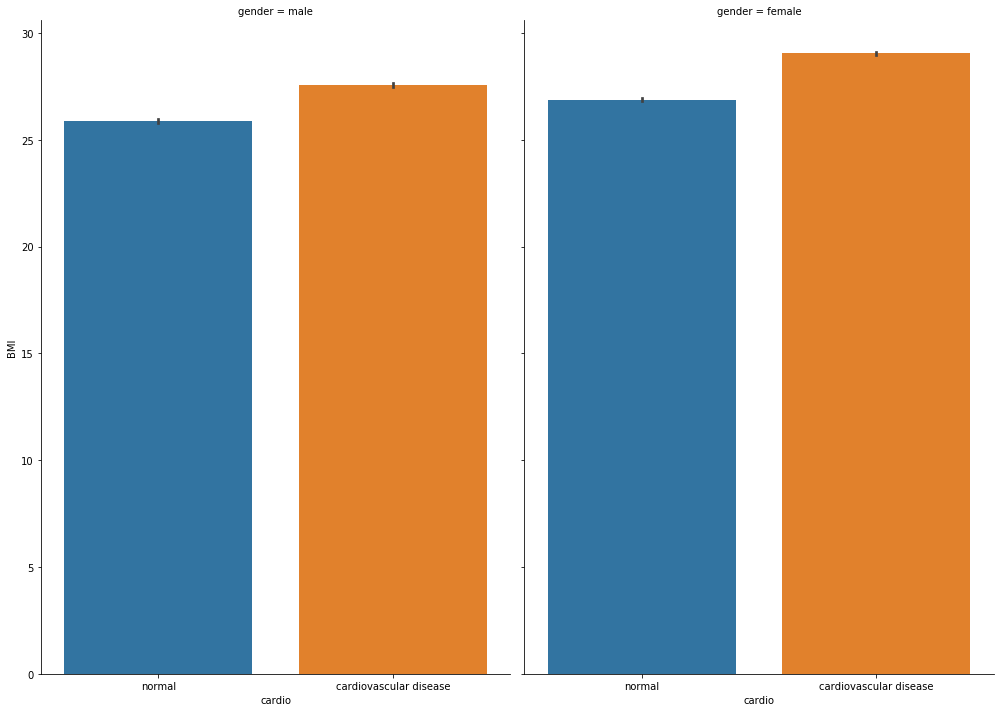

In [157]:
# визуализируем индекс массы тела и наличие/отсутствие заболевания
sns.catplot(x="cardio", y="BMI", col="gender", data=cardio_data_filtered, kind="bar",\
            height=10, aspect=.7)

In [ ]:
# видим вне зависимости от пола, индекс массы тела выше у людей, имеющих заболевание